In [12]:
pip install datasets

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/2.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.9 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.9 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.9 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.9 MB ? eta -:--:--
   ------- -------------------------------- 0.5/2.9 MB 559.3 kB/s eta 0:00:05
   ------- -------------------------------- 0.5/2.9 MB 559.3 kB/s eta 0:00:05
   ---------- ----------------------------- 0.8/2.9 MB 609.8 kB/s eta 0:00:04
   -------------- ------------------------- 1.0/2.9 MB 687.8 kB/s eta 0:00:03
   -------------- ------------------------- 1.0/2.9 MB 687.8 kB/s eta 0:00:03
   ------------------ --------------------- 1.3/2.9 MB 682.9 kB/s eta 0:00:03
   --------------------- ------------------ 1.6/2.9 MB 718.1 kB/s eta 0:00:02
   --------------------- ------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [4]:
pip install transformers

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/12.0 MB ? eta -:--:--
    --------------------------------------- 0.3/12.0 MB ? eta -:--:--
   -- ------------------------------------- 0.8/12.0 MB 2.1 MB/s eta 0:00:06
   ---- ----------------------------------- 1.3/12.0 MB 2.2 MB/s eta 0:00:05
   ----- ---------------------------------- 1.6/12.0 MB 2.2 MB/s eta 0:00:05
   ------ --------------------------------- 1.8/12.0 MB 1.7 MB/s eta 0:00:06
   ------ --------------------------------- 1.8/12.0 MB 1.7 MB/s eta 0:00:06
   ------ --------------------------------- 1.8/12.0 MB 1.7 MB/s eta 0:00:06
   ------ --------------------------------- 2.1/12.0 MB 1.3 MB/s eta 0:00:08
   ------ --------------------------------- 2.1/12.0 MB 1.3 MB/s eta 0:00:08
   ------- -------------------------------- 2.4/12.0 MB 1.1 MB/s eta 0:00:09
   ------- -------------------------------- 2.4/12.0 MB 1.1 MB/s eta 0:00:09
   ------- -

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [1]:
pip install ipywidgets

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install rouge-score

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24971 sha256=9d836366d1338d31e178efbeebbf9d466e74742555bc1714bcc04c3d10452f6d
  Stored in directory: c:\users\abhisek\appdata\local\pip\cache\wheels\44\af\da\5ffc433e2786f0b1a9c6f458d5fb8f611d8eb332387f18698f
Successfully built rouge-score
Note: you may need to restart the kernel to use updated packages.


  DEPRECATION: Building 'rouge-score' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'rouge-score'. Discussion can be found at https://github.com/pypa/pip/issues/6334


In [1]:
# Cell 1 — imports and config load
import os
import json
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tqdm import tqdm

# local utilities (make sure your PYTHONPATH or notebook root points to project root)
from src.utils import load_config, prepare_dataset, make_tf_dataset, ensure_dir
from src.model import build_multimodal_model

# for evaluation
import nltk
from rouge_score import rouge_scorer

# load config
cfg = load_config("config.yaml")
print("Config loaded:", cfg["dataset"]["hf_name"])
print("Seq len:", cfg["dataset"]["seq_len"], "Image size:", cfg["dataset"]["image_size"])


Config loaded: daniel3303/StoryReasoning
Seq len: 3 Image size: 128


In [2]:
# Cell 2
# set keep_small=True for fast iteration. Set False for the full dataset (may be slow).
processed, tokenizer = prepare_dataset(cfg, split="train", keep_small=False)
print("Processed examples (preview):", len(processed))
print("Tokenizer vocab size:", tokenizer.vocab_size)

# Inspect first example
ex0 = processed[0]
print("Example 0 image sequence shape (seq_len, H, W, C):", ex0['images'].shape)
print("Example 0 input_ids shape (seq_len, T):", ex0['input_ids'].shape)


Processed examples (preview): 3552
Tokenizer vocab size: 30522
Example 0 image sequence shape (seq_len, H, W, C): (3, 128, 128, 3)
Example 0 input_ids shape (seq_len, T): (3, 32)


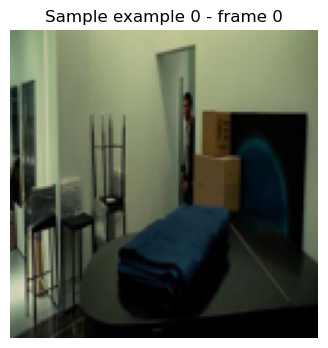

In [3]:
# Cell 3 — visualize a sample frame (denormalize from [-1,+1] -> [0,1])
sample_idx = 0
frame_idx = 0   # which frame within the seq to show (0..seq_len-1)
img = processed[sample_idx]['images'][frame_idx]
# denormalize
img_viz = (img / 2.0) + 0.5
plt.figure(figsize=(4,4))
plt.imshow(np.clip(img_viz, 0, 1))
plt.axis("off")
plt.title(f"Sample example {sample_idx} - frame {frame_idx}")
plt.show()

In [4]:
# Cell 4 — build models and print summaries (visual encoder + full model)
models = build_multimodal_model(cfg)
visual_enc = models['visual_enc']
text_enc = models['text_enc']
full_model = models['full_model']
text_decoder = models['text_decoder']

print("Visual encoder summary:")
visual_enc.summary()

print("\nFull multimodal model summary:")
full_model.summary()


Visual encoder summary:


Model: "visual_encoder_cnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ image_input (InputLayer)        │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ proj_dense (Dense)              │ (None, 512)            │       131,584 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 707,200 (2.70 MB)

 Trainable params: 705,856 (2.69 MB)

 Non-trainable params: 1,344 (5.25 KB)


Full multimodal model summary:


Model: "multimodal_model"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ images_seq          │ (None, 3, 128,    │          0 │ -                 │
│ (InputLayer)        │ 128, 3)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ captions_seq        │ (None, 3, 32)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ td_visual           │ (None, 3, 512)    │    707,200 │ images_seq[0][0]  │
│ (TimeDistributed)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ td_text             │ (None, 3, 512)    │ 10,821,624 │ captions_seq[0][… │
│ (TimeDistributed)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ fuse_vis_text       │ (None, 3, 1024)   │          0 │ td_visual[0][0],  │
│ (Concatenate)       │                   │            │ td_text[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ td_proj             │ (None, 3, 512)    │    524,800 │ fuse_vis_text[0]… │
│ (TimeDistributed)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ temporal_lstm       │ [(None, 3, 512),  │  2,099,200 │ td_proj[0][0]     │
│ (LSTM)              │ (None, 512),      │            │                   │
│                     │ (None, 512)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dec_input           │ (None, 32)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item (GetItem)  │ (None, 512)       │          0 │ temporal_lstm[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, 32, 300)   │  9,156,600 │ dec_input[0][0]   │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ repeat_vector       │ (None, 32, 512)   │          0 │ get_item[0][0]    │
│ (RepeatVector)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 32, 812)   │          0 │ embedding_1[0][0… │
│ (Concatenate)       │                   │            │ repeat_vector[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_1 (LSTM)       │ (None, 32, 512)   │  2,713,600 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 512)       │    262,656 │ get_item[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ time_distributed    │ (None, 32, 30522) │ 15,657,786 │ lstm_1[0][0]      │
│ (TimeDistributed)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 512)       │    262,656 │ dense_2[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 42,206,122 (161.00 MB)

 Trainable params: 42,204,778 (161.00 MB)

 Non-trainable params: 1,344 (5.25 KB)

In [5]:
# Cell 5 — quick forward pass through visual encoder to inspect features
# take a small batch from processed
tfds = make_tf_dataset(processed, cfg, shuffle=True)
for batch in tfds.take(1):
    images_b, input_ids_b = batch
    break

# images_b shape: (B, seq_len, H, W, C)
sample_img_batch = images_b.numpy()[0, 0:1]  # take first example, first timestep (B_img=1, H, W, C)
feat = visual_enc(sample_img_batch)
print("Visual feature shape:", feat.shape)
print("First 8 dims:", feat.numpy().ravel()[:8])


Visual feature shape: (1, 512)
First 8 dims: [0.00885396 0.01649048 0.00707472 0.         0.00040335 0.
 0.02162029 0.00256649]


In [6]:
# Cell 6 — helper functions: collate_for_training, greedy decoder, evaluation helpers
import math
from nltk.translate.bleu_score import SmoothingFunction, sentence_bleu

bos_id = int(cfg['model'].get('bos_token_id', 101))
pad_id = int(cfg['model'].get('pad_token_id', 0))
eos_id = int(cfg['model'].get('eos_token_id', 102))
max_dec_len = cfg['dataset']['max_caption_len']

def collate_for_training_np(batch_images, batch_input_ids, bos_id=bos_id):
    """
    batch_input_ids: (B, seq_len, T)
    returns: images (B,S,H,W,C), captions_seq (B,S,T), dec_input (B,T), dec_target (B,T)
    """
    target = batch_input_ids[:, -1, :]   # last caption (B,T)
    dec_input = np.concatenate([np.full((target.shape[0], 1), bos_id, dtype=np.int32), target[:, :-1]], axis=1)
    return batch_images, batch_input_ids, dec_input, target

def greedy_decode_one_example(text_decoder_model, images_seq_np, captions_seq_np, tokenizer, max_len=None):
    """
    images_seq_np: (seq_len, H, W, C)
    captions_seq_np: (seq_len, T)
    returns: decoded text and token ids
    """
    if max_len is None:
        max_len = max_dec_len
    images_b = np.expand_dims(images_seq_np, axis=0).astype(np.float32)
    captions_b = np.expand_dims(captions_seq_np, axis=0).astype(np.int32)
    generated = [bos_id]
    for t in range(max_len):
        dec_input = np.zeros((1, max_len), dtype=np.int32)
        dec_input[0, :len(generated)] = np.array(generated, dtype=np.int32)
        logits = text_decoder_model([images_b, captions_b, dec_input], training=False)  # (1, T, V)
        logits_t = logits.numpy()[0, t, :]
        next_token = int(np.argmax(logits_t))
        generated.append(next_token)
        if next_token == eos_id:
            break
    gen_ids = [int(x) for x in generated[1:] if int(x) != pad_id and int(x) != eos_id]
    gen_text = tokenizer.decode(gen_ids, skip_special_tokens=True)
    return gen_text, gen_ids

def compute_bleu(ref, hyp):
    """
    Simple sentence BLEU with smoothing
    """
    try:
        ref_tokens = nltk.word_tokenize(ref.lower())
        hyp_tokens = nltk.word_tokenize(hyp.lower())
        if len(hyp_tokens) == 0:
            return 0.0
        smoothing = SmoothingFunction().method1
        bleu = sentence_bleu([ref_tokens], hyp_tokens, smoothing_function=smoothing)
        return bleu
    except Exception:
        return 0.0


In [21]:
# Cell: Training + Validation with robust token accuracy and three sequence accuracies
import re
import nltk
from nltk.translate.bleu_score import SmoothingFunction, sentence_bleu
from rouge_score import rouge_scorer
from tqdm import tqdm

nltk.download('punkt', quiet=True)
smooth_fn = SmoothingFunction().method1
rouge = rouge_scorer.RougeScorer(['rougeL'], use_stemmer=True)

# config of run
epochs = 5
max_steps_total = 50     # global cap across all epochs (None to disable)
max_steps_per_epoch = 10  # per-epoch cap (None to disable)
eval_size = 100          # number of eval examples (keep small for quick runs)
bleu_fuzzy_threshold = 0.25  # threshold for fuzzy seq match (adjustable)

# pad id preference
try:
    pad_id_runtime = int(tokenizer.pad_token_id)
except Exception:
    pad_id_runtime = int(cfg['model'].get('pad_token_id', 0))
bos_id = int(cfg['model'].get('bos_token_id', 101))
eos_id = int(cfg['model'].get('eos_token_id', 102))
print(f"Using pad_id={pad_id_runtime}, bos={bos_id}, eos={eos_id}")

# normalizer for text-based sequence match
def normalize_text(s):
    s = s.lower().strip()
    s = re.sub(r'\s+', ' ', s)
    s = re.sub(r'[^\w\s]', '', s)  # remove punctuation
    return s

# repair processed list if many empty last captions (non-destructive)
seq_len = cfg['dataset']['seq_len']
max_cap_len = cfg['dataset']['max_caption_len']

def repair_processed_if_needed(proc_list):
    empty_before = sum(1 for ex in proc_list if not np.any(ex['input_ids'][-1] != pad_id_runtime))
    if empty_before == 0:
        return 0,0
    try:
        placeholder_text = "[NO_CAPTION]"
        ph_tok = tokenizer(placeholder_text, padding='max_length', truncation=True,
                           max_length=max_cap_len, return_tensors="np")['input_ids'][0]
    except Exception:
        ph_tok = np.zeros((max_cap_len,), dtype=np.int32)

    repaired = 0
    filled = 0
    for ex in proc_list:
        input_ids = ex['input_ids']
        if input_ids.shape[0] != seq_len:
            pad_rows = np.zeros((seq_len - input_ids.shape[0], max_cap_len), dtype=np.int32)
            input_ids = np.vstack([input_ids, pad_rows])
        nonpad_rows = np.any(input_ids != pad_id_runtime, axis=1)
        if nonpad_rows[-1]:
            ex['input_ids'] = input_ids
            continue
        nonempty = np.where(nonpad_rows)[0]
        if nonempty.size > 0:
            last_nonempty = nonempty[-1]
            for r in range(last_nonempty+1, seq_len):
                input_ids[r] = input_ids[last_nonempty]
            ex['input_ids'] = input_ids
            repaired += 1
        else:
            for r in range(seq_len):
                input_ids[r] = ph_tok
            ex['input_ids'] = input_ids
            filled += 1
    return repaired, filled

r,f = repair_processed_if_needed(processed)
if r+f > 0:
    print(f"Repaired processed examples: copied last non-empty into pads={r}, filled placeholder={f}")

# Build dataset
tfds_train = make_tf_dataset(processed, cfg, shuffle=True)

# training state & history
optimizer = tf.keras.optimizers.Adam(learning_rate=float(cfg['training'].get('lr', 1e-4)))
history = []
global_step = 0

print("Starting training with accurate aggregated token & sequence metrics...")

for epoch in range(epochs):
    print(f"\n=== Epoch {epoch+1}/{epochs} ===")
    step_in_epoch = 0

    # Epoch aggregators
    epoch_correct_tokens = 0
    epoch_nonpad_tokens = 0
    epoch_seq_strict_correct = 0
    epoch_seq_norm_correct = 0
    epoch_seq_fuzzy_correct = 0
    epoch_seq_valid = 0

    for batch in tfds_train:
        images_batch, input_ids_batch = batch
        images_np = images_batch.numpy()
        input_ids_np = input_ids_batch.numpy()
        imgs, caps_seq, dec_in, dec_tgt = collate_for_training_np(images_np, input_ids_np)

        # to tensors
        images_tf = tf.convert_to_tensor(imgs, dtype=tf.float32)
        caps_tf = tf.convert_to_tensor(caps_seq, dtype=tf.int32)
        dec_in_tf = tf.convert_to_tensor(dec_in, dtype=tf.int32)
        dec_tgt_tf = tf.convert_to_tensor(dec_tgt, dtype=tf.int32)

        with tf.GradientTape() as tape:
            logits, img_pred = full_model([images_tf, caps_tf, dec_in_tf], training=True)

            per_token_loss = tf.keras.losses.sparse_categorical_crossentropy(dec_tgt_tf, logits, from_logits=True)
            mask = tf.cast(tf.not_equal(dec_tgt_tf, pad_id_runtime), tf.float32)
            per_token_loss = per_token_loss * mask
            loss_text = tf.reduce_sum(per_token_loss) / (tf.reduce_sum(mask) + 1e-8)

            last_images = images_tf[:, -1, :, :, :]
            target_img_feat = tf.stop_gradient(visual_enc(last_images, training=False))
            loss_img = tf.reduce_mean(tf.square(target_img_feat - img_pred))

            loss = loss_text + 0.5 * loss_img

        # update
        grads = tape.gradient(loss, full_model.trainable_variables)
        grads, _ = tf.clip_by_global_norm(grads, float(cfg['training'].get('grad_clip',1.0)))
        optimizer.apply_gradients(zip(grads, full_model.trainable_variables))

        # Convert to numpy
        preds = tf.argmax(logits, axis=-1, output_type=tf.int32).numpy()  # (B, T)
        dec_tgt_np = dec_tgt_tf.numpy()  # (B, T)
        mask_np = (dec_tgt_np != pad_id_runtime).astype(np.int32)  # (B, T)

        # token-level
        correct_tokens_np = (preds == dec_tgt_np).astype(np.int32) * mask_np
        batch_correct = int(correct_tokens_np.sum())
        batch_nonpad = int(mask_np.sum())
        epoch_correct_tokens += batch_correct
        epoch_nonpad_tokens += batch_nonpad

        # sequence-level (strict + norm + fuzzy) per valid sample
        B = preds.shape[0]
        for i in range(B):
            mask_i = mask_np[i].astype(bool)
            if mask_i.sum() == 0:
                continue
            epoch_seq_valid += 1
            pred_ids_i = [int(x) for x in preds[i][mask_i]]
            tgt_ids_i = [int(x) for x in dec_tgt_np[i][mask_i]]
            # strict token-id exact match
            if pred_ids_i == tgt_ids_i:
                epoch_seq_strict_correct += 1
            # normalized-string match
            pred_text = tokenizer.decode(preds[i].tolist(), skip_special_tokens=True)
            tgt_text = tokenizer.decode(dec_tgt_np[i].tolist(), skip_special_tokens=True)
            pred_norm = normalize_text(pred_text)
            tgt_norm = normalize_text(tgt_text)
            if (tgt_norm != "") and (pred_norm == tgt_norm):
                epoch_seq_norm_correct += 1
            # fuzzy BLEU
            try:
                hyp_tokens = nltk.word_tokenize(pred_norm)
                ref_tokens = nltk.word_tokenize(tgt_norm)
                bleu = sentence_bleu([ref_tokens], hyp_tokens, smoothing_function=smooth_fn) if len(hyp_tokens)>0 and len(ref_tokens)>0 else 0.0
            except Exception:
                bleu = 0.0
            if bleu >= bleu_fuzzy_threshold:
                epoch_seq_fuzzy_correct += 1

        # per-batch metrics
        batch_token_acc = (batch_correct / batch_nonpad) if batch_nonpad>0 else 0.0
        # for batch-level seq accs, compute proportion among valid samples in batch
        batch_seq_valid = int((mask_np.sum(axis=1) > 0).sum())
        # compute batch strict seq acc (if any valid)
        if batch_seq_valid > 0:
            batch_seq_strict = int(((preds == dec_tgt_np).all(axis=1) & (mask_np.sum(axis=1)>0)).sum()) / batch_seq_valid
        else:
            batch_seq_strict = 0.0

        history.append({
            "global_step": int(global_step),
            "epoch": int(epoch+1),
            "step_in_epoch": int(step_in_epoch),
            "loss": float(loss.numpy()),
            "loss_text": float(loss_text.numpy()),
            "loss_img": float(loss_img.numpy()),
            "batch_token_acc": float(batch_token_acc),
            "batch_seq_strict": float(batch_seq_strict),
            "batch_nonpad_tokens": batch_nonpad,
            "batch_valid_seqs": batch_seq_valid
        })

        # logging aggregated so far for epoch
        if global_step % 10 == 0:
            agg_token_acc = (epoch_correct_tokens / epoch_nonpad_tokens) if epoch_nonpad_tokens > 0 else 0.0
            agg_seq_strict = (epoch_seq_strict_correct / epoch_seq_valid) if epoch_seq_valid>0 else 0.0
            agg_seq_norm = (epoch_seq_norm_correct / epoch_seq_valid) if epoch_seq_valid>0 else 0.0
            agg_seq_fuzzy = (epoch_seq_fuzzy_correct / epoch_seq_valid) if epoch_seq_valid>0 else 0.0
            print(f"g_step {global_step} | epoch {epoch+1} step {step_in_epoch} | loss={float(loss.numpy()):.4f} | batch_tok_acc={batch_token_acc:.4f} | agg_tok_acc_so_far={agg_token_acc:.4f} | agg_seq_strict={agg_seq_strict:.4f} agg_seq_norm={agg_seq_norm:.4f} agg_seq_fuzzy={agg_seq_fuzzy:.4f} | batch_tokens={batch_nonpad} valid_seqs={batch_seq_valid}")

        # counters & stop criteria
        global_step += 1
        step_in_epoch += 1
        if (max_steps_per_epoch is not None and step_in_epoch >= max_steps_per_epoch):
            break
        if (max_steps_total is not None and global_step >= max_steps_total):
            break

    # end-of-epoch aggregated summary
    epoch_tok_acc = (epoch_correct_tokens / epoch_nonpad_tokens) if epoch_nonpad_tokens>0 else 0.0
    epoch_seq_strict_acc = (epoch_seq_strict_correct / epoch_seq_valid) if epoch_seq_valid>0 else 0.0
    epoch_seq_norm_acc = (epoch_seq_norm_correct / epoch_seq_valid) if epoch_seq_valid>0 else 0.0
    epoch_seq_fuzzy_acc = (epoch_seq_fuzzy_correct / epoch_seq_valid) if epoch_seq_valid>0 else 0.0
    print(f"\nEpoch {epoch+1} AGGREGATE -> token_acc={epoch_tok_acc:.4f} | seq_strict={epoch_seq_strict_acc:.4f} | seq_norm={epoch_seq_norm_acc:.4f} | seq_fuzzy={epoch_seq_fuzzy_acc:.4f} | valid_seqs={epoch_seq_valid}")

    if (max_steps_total is not None and global_step >= max_steps_total):
        print("Reached global step limit, stopping training.")
        break

# Save step-level history
ensure_dir("results")
with open("results/loss_history.json", "w") as f:
    json.dump(history, f, indent=2)
print("Saved training history to results/loss_history.json")

# -------------------------
# Validation / Decoding Pass
# -------------------------
print("\nRunning validation decoding pass (greedy) ...")
processed_eval, tokenizer_eval = prepare_dataset(cfg, split="train", keep_small=False)
N_eval = min(len(processed_eval), eval_size)
indices = list(range(len(processed_eval)))
np.random.shuffle(indices)
indices = indices[:N_eval]

bleu_scores = []
rouge_scores = []
val_strict_matches = 0
val_norm_matches = 0
val_fuzzy_matches = 0
val_valid = 0

for idx in tqdm(indices, desc="Eval"):
    ex = processed_eval[idx]
    pred_text, pred_ids = greedy_decode_single(text_decoder, ex['images'], ex['input_ids'])
    tgt_ids = [int(x) for x in ex['input_ids'][-1] if int(x) != pad_id_runtime]
    gt_text = tokenizer_eval.decode(tgt_ids, skip_special_tokens=True)

    # strict token-id match
    strict_match = 1 if (pred_ids == tgt_ids and len(tgt_ids)>0) else 0

    # normalized-string match
    pred_norm = normalize_text(pred_text)
    gt_norm = normalize_text(gt_text)
    norm_match = 1 if (gt_norm != "" and pred_norm == gt_norm) else 0

    # fuzzy BLEU
    try:
        hyp_tokens = nltk.word_tokenize(pred_norm)
        ref_tokens = nltk.word_tokenize(gt_norm)
        bleu = sentence_bleu([ref_tokens], hyp_tokens, smoothing_function=smooth_fn) if len(hyp_tokens)>0 and len(ref_tokens)>0 else 0.0
    except Exception:
        bleu = 0.0
    fuzzy_match = 1 if bleu >= bleu_fuzzy_threshold else 0

    # rouge
    r = rouge.score(gt_text, pred_text)['rougeL'].fmeasure if gt_text.strip()!="" else 0.0

    bleu_scores.append(bleu)
    rouge_scores.append(r)
    if len(tgt_ids)>0:
        val_valid += 1
        val_strict_matches += strict_match
        val_norm_matches += norm_match
        val_fuzzy_matches += fuzzy_match

# aggregate validation metrics
avg_bleu = float(np.mean(bleu_scores)) if bleu_scores else 0.0
avg_rouge = float(np.mean(rouge_scores)) if rouge_scores else 0.0
val_strict_acc = (val_strict_matches / val_valid) if val_valid>0 else 0.0
val_norm_acc = (val_norm_matches / val_valid) if val_valid>0 else 0.0
val_fuzzy_acc = (val_fuzzy_matches / val_valid) if val_valid>0 else 0.0

print(f"\nValidation (N={N_eval}, valid={val_valid}) -> Avg BLEU={avg_bleu:.4f}, Avg ROUGE-L={avg_rouge:.4f}")
print(f"Seq strict match={val_strict_acc:.4f}, seq norm match={val_norm_acc:.4f}, seq fuzzy(>={bleu_fuzzy_threshold})={val_fuzzy_acc:.4f}")

eval_out = {
    "num_eval": N_eval,
    "num_valid_eval": val_valid,
    "avg_bleu": avg_bleu,
    "avg_rouge": avg_rouge,
    "seq_strict_acc": val_strict_acc,
    "seq_norm_acc": val_norm_acc,
    "seq_fuzzy_acc": val_fuzzy_acc,
    "bleu_scores": bleu_scores,
    "rouge_scores": rouge_scores
}
with open("results/eval_metrics.json", "w") as f:
    json.dump(eval_out, f, indent=2)
print("Saved evaluation metrics to results/eval_metrics.json")


Using pad_id=0, bos=101, eos=102
Starting training with accurate aggregated token & sequence metrics...

=== Epoch 1/5 ===
g_step 0 | epoch 1 step 0 | loss=2.3333 | batch_tok_acc=0.4000 | agg_tok_acc_so_far=0.4000 | agg_seq_strict=0.0000 agg_seq_norm=0.0000 agg_seq_fuzzy=0.0000 | batch_tokens=80 valid_seqs=16

Epoch 1 AGGREGATE -> token_acc=0.4000 | seq_strict=0.0000 | seq_norm=0.0000 | seq_fuzzy=0.0000 | valid_seqs=160

=== Epoch 2/5 ===
g_step 10 | epoch 2 step 0 | loss=2.0559 | batch_tok_acc=0.4000 | agg_tok_acc_so_far=0.4000 | agg_seq_strict=0.0000 agg_seq_norm=0.0000 agg_seq_fuzzy=0.0000 | batch_tokens=80 valid_seqs=16

Epoch 2 AGGREGATE -> token_acc=0.4000 | seq_strict=0.0000 | seq_norm=0.0000 | seq_fuzzy=0.0000 | valid_seqs=160

=== Epoch 3/5 ===
g_step 20 | epoch 3 step 0 | loss=1.8743 | batch_tok_acc=0.4000 | agg_tok_acc_so_far=0.4000 | agg_seq_strict=0.0000 agg_seq_norm=0.0000 agg_seq_fuzzy=0.0000 | batch_tokens=80 valid_seqs=16

Epoch 3 AGGREGATE -> token_acc=0.5038 | seq_st

Eval: 100%|██████████| 100/100 [05:42<00:00,  3.43s/it]


Validation (N=100, valid=0) -> Avg BLEU=0.0000, Avg ROUGE-L=0.0000
Seq strict match=0.0000, seq norm match=0.0000, seq fuzzy(>=0.25)=0.0000
Saved evaluation metrics to results/eval_metrics.json


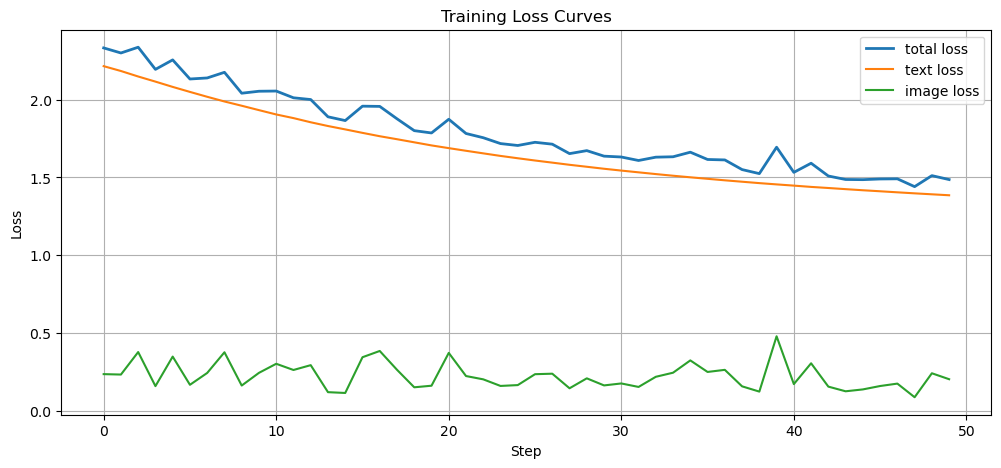

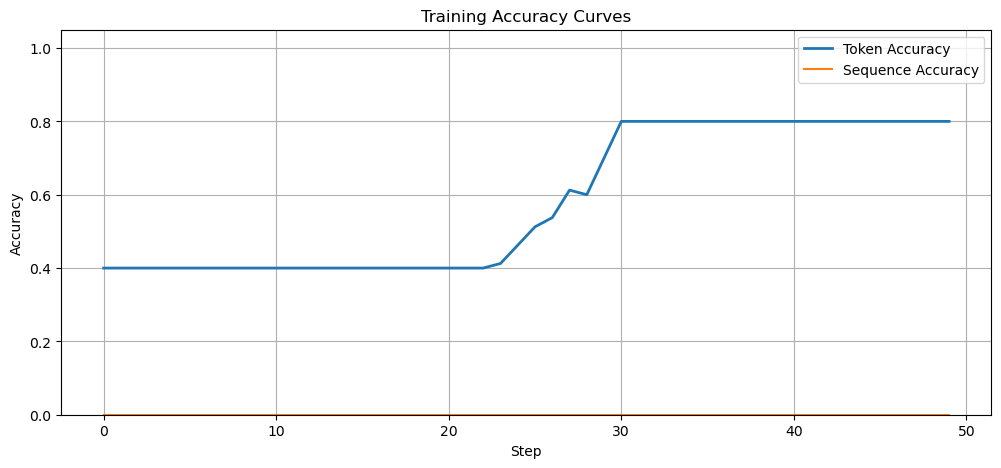

In [30]:
# Cell 8 — Plot loss curves AND accuracy curves (token_acc & seq_acc)

loss_file = "results/loss_history.json"

if os.path.exists(loss_file):
    with open(loss_file, "r") as f:
        loss_history = json.load(f)

    steps = [d["global_step"] for d in loss_history]

    # Loss values
    losses = [d["loss"] for d in loss_history]
    losses_text = [d["loss_text"] for d in loss_history]
    losses_img = [d["loss_img"] for d in loss_history]

    # Accuracy values (added)
    token_acc = [d.get("batch_token_acc", None) for d in loss_history]
    seq_acc = [d.get("batch_seq_strict", None) for d in loss_history]

    # ----------------------------
    # LOSS PLOTS
    # ----------------------------
    plt.figure(figsize=(12,5))
    plt.plot(steps, losses, label="total loss", linewidth=2)
    plt.plot(steps, losses_text, label="text loss")
    plt.plot(steps, losses_img, label="image loss")
    plt.xlabel("Step")
    plt.ylabel("Loss")
    plt.title("Training Loss Curves")
    plt.legend()
    plt.grid(True)
    plt.show()

    # ----------------------------
    # ACCURACY PLOTS
    # ----------------------------
    plt.figure(figsize=(12,5))
    plt.plot(steps, token_acc, label="Token Accuracy", linewidth=2)
    plt.plot(steps, seq_acc, label="Sequence Accuracy")
    plt.xlabel("Step")
    plt.ylabel("Accuracy")
    plt.title("Training Accuracy Curves")
    plt.ylim(0, 1.05)
    plt.legend()
    plt.grid(True)
    plt.show()

else:
    print("No loss_history.json found; run training cells first.")

In [25]:
# Cell 9 — save a checkpoint (weights) from the notebook models for future loading
ensure_dir(cfg['training'].get('save_dir', 'results/checkpoints'))
ckpt_prefix = os.path.join(cfg['training'].get('save_dir', 'results/checkpoints'), "ckpt_notebook")
full_model.save_weights(f"{ckpt_prefix}_quick.weights.h5")
print("Saved model weights to:", f"{ckpt_prefix}_quick.weights.h5")


Saved model weights to: results/checkpoints\ckpt_notebook_quick.weights.h5


In [26]:
# Cell 10 — greedy decode a few examples and inspect outputs
num_show = 8
examples_out = []

for i in range(min(num_show, len(processed))):
    ex = processed[i]
    pred_text, pred_ids = greedy_decode_one_example(text_decoder, ex['images'], ex['input_ids'], tokenizer)
    # ground truth = last caption (remove pads and special tokens)
    tgt_ids = [int(x) for x in ex['input_ids'][-1] if int(x) != pad_id]
    gt_text = tokenizer.decode(tgt_ids, skip_special_tokens=True)
    print(f"\nExample {i+1}")
    print("GT:", gt_text)
    print("PR:", pred_text)
    examples_out.append({"gt": gt_text, "pred": pred_text})

# Save examples to file
with open("results/sample_predictions.json", "w") as f:
    json.dump(examples_out, f, indent=2)
print("\nSaved sample predictions to results/sample_predictions.json")



Example 1
GT: < gd
PR: < g

Example 2
GT: < gd
PR: < g

Example 3
GT: < gd
PR: < g

Example 4
GT: < gd
PR: < g

Example 5
GT: < gd
PR: < g

Example 6
GT: < gd
PR: < g

Example 7
GT: < gd
PR: < g

Example 8
GT: < gd
PR: < g

Saved sample predictions to results/sample_predictions.json


In [27]:
# Cell 11 — corpus evaluation: BLEU & ROUGE-L on a subset
# Note: this is a crude evaluation (sentence BLEU). For better measures, run full-length eval on larger set.
nltk.download('punkt')

# load a larger processed eval set (set keep_small=False if you want full)
processed_eval, tokenizer_eval = prepare_dataset(cfg, split="train", keep_small=False)

# limit for quick evaluation
N = min(len(processed_eval), 100)   # adjust as needed
indices = list(range(len(processed_eval)))
np.random.shuffle(indices)
indices = indices[:N]

scorer = rouge_scorer.RougeScorer(['rougeL'], use_stemmer=True)

bleu_scores = []
rougeL_scores = []
examples = []

for idx in tqdm(indices, desc="Evaluating"):
    ex = processed_eval[idx]
    pred_text, pred_ids = greedy_decode_one_example(text_decoder, ex['images'], ex['input_ids'], tokenizer_eval)
    tgt_ids = [int(x) for x in ex['input_ids'][-1] if int(x) != pad_id]
    gt_text = tokenizer_eval.decode(tgt_ids, skip_special_tokens=True)

    bleu = compute_bleu(gt_text, pred_text)
    r = scorer.score(gt_text, pred_text)['rougeL'].fmeasure

    bleu_scores.append(bleu)
    rougeL_scores.append(r)

    if len(examples) < 10:
        examples.append({"gt": gt_text, "pred": pred_text, "bleu": bleu, "rougeL": r})

# report
import statistics
avg_bleu = statistics.mean(bleu_scores) if bleu_scores else 0.0
avg_rouge = statistics.mean(rougeL_scores) if rougeL_scores else 0.0
print(f"\nAvg BLEU (sentence-level) on {N} examples: {avg_bleu:.4f}")
print(f"Avg ROUGE-L (F1) on {N} examples: {avg_rouge:.4f}")

# save evaluation results
eval_out = {
    "num_eval": N,
    "avg_bleu": avg_bleu,
    "avg_rougeL": avg_rouge,
    "bleu_scores": bleu_scores,
    "rougeL_scores": rougeL_scores
}
with open("results/eval_metrics.json", "w") as f:
    json.dump(eval_out, f, indent=2)
print("Saved evaluation metrics to results/eval_metrics.json")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Abhisek\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Evaluating: 100%|██████████| 100/100 [05:43<00:00,  3.43s/it]


Avg BLEU (sentence-level) on 100 examples: 0.0000
Avg ROUGE-L (F1) on 100 examples: 0.0000
Saved evaluation metrics to results/eval_metrics.json


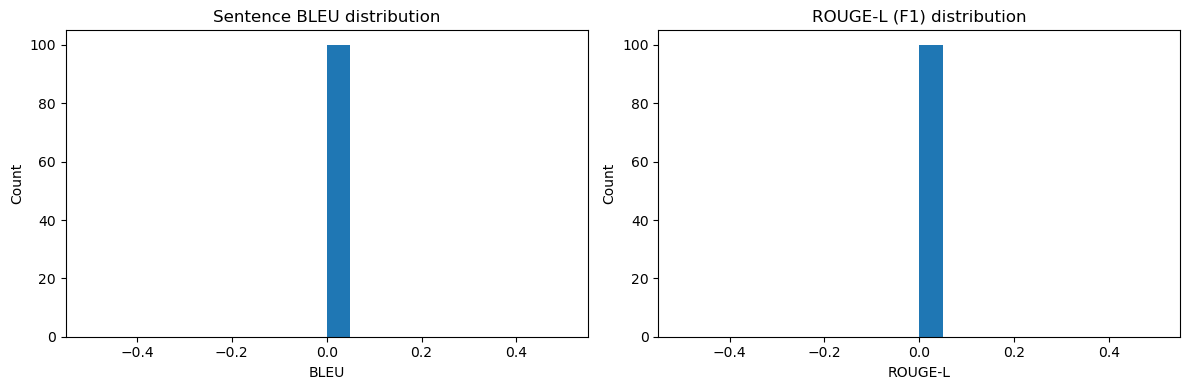


Example predictions (few):

Example 1: BLEU=0.0000 ROUGE-L=0.0000
GT: 
PR: < g

Example 2: BLEU=0.0000 ROUGE-L=0.0000
GT: 
PR: < g

Example 3: BLEU=0.0000 ROUGE-L=0.0000
GT: 
PR: < g

Example 4: BLEU=0.0000 ROUGE-L=0.0000
GT: 
PR: < g

Example 5: BLEU=0.0000 ROUGE-L=0.0000
GT: 
PR: < g

Example 6: BLEU=0.0000 ROUGE-L=0.0000
GT: 
PR: < g

Example 7: BLEU=0.0000 ROUGE-L=0.0000
GT: 
PR: < g

Example 8: BLEU=0.0000 ROUGE-L=0.0000
GT: 
PR: < g

Example 9: BLEU=0.0000 ROUGE-L=0.0000
GT: 
PR: < g

Example 10: BLEU=0.0000 ROUGE-L=0.0000
GT: 
PR: < g


In [28]:
# Cell 12 — visualize BLEU / ROUGE distributions and some example predictions
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.hist(bleu_scores, bins=20)
plt.title("Sentence BLEU distribution")
plt.xlabel("BLEU")
plt.ylabel("Count")

plt.subplot(1,2,2)
plt.hist(rougeL_scores, bins=20)
plt.title("ROUGE-L (F1) distribution")
plt.xlabel("ROUGE-L")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# display example predictions
print("\nExample predictions (few):")
for i, e in enumerate(examples):
    print(f"\nExample {i+1}: BLEU={e['bleu']:.4f} ROUGE-L={e['rougeL']:.4f}")
    print("GT:", e['gt'])
    print("PR:", e['pred'])


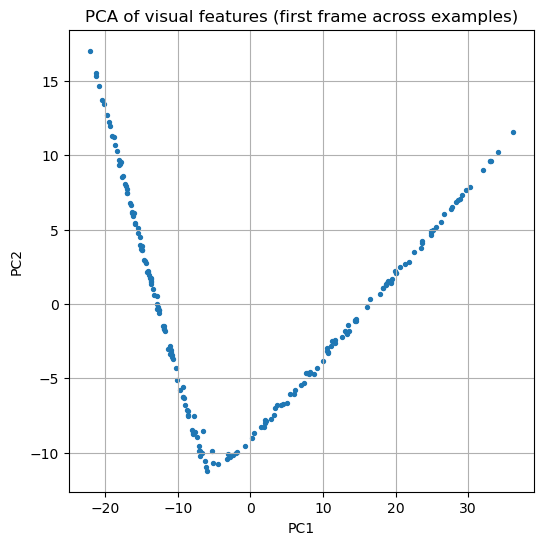

In [29]:
# Cell 13 — optional: visualize PCA of visual features for a small set of images
# (useful to inspect learned feature space)
from sklearn.decomposition import PCA

# collect features for first M examples
M = min(200, len(processed))
feats = []
labels = []
for i in range(M):
    imgs = np.expand_dims(processed[i]['images'][0], axis=0).astype(np.float32)  # first frame per example
    f = visual_enc(imgs).numpy().squeeze()
    feats.append(f)
    labels.append(i)
feats = np.stack(feats, axis=0)

pca = PCA(n_components=2)
proj = pca.fit_transform(feats)

plt.figure(figsize=(6,6))
plt.scatter(proj[:,0], proj[:,1], s=8)
plt.title("PCA of visual features (first frame across examples)")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.grid(True)
plt.show()
